<a href="https://colab.research.google.com/github/abby2395/heart-disease-detection/blob/main/end_to_end_heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a ML Model for Detecting Heart Disease

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This model uses a classification supervised machine learning model to detect whether anyone has heart disease or not by using the medical attributes.

## Steps to follow:

**1. Problem Definition:** On having a clinical record of a patient, can we predict whether the patient has the heart disease or not.

**2. Data:** Information about the dataset. The dataset is originally taken from Cleveland, UCI machine learning repository.https://archive.ics.uci.edu/ml/datasets/heart+Disease

The data is also available on kaggle: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

**3. Evaluation:** 95% accuracy will pursue the project.

**4. Features:** Create data dictionary

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern
chol - serum cholestoral in mg/dl

serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes

restecg - resting electrocardiographic results

0: Nothing to note

1: ST-T Wave abnormality

can range from mild symptoms to severe problems
signals non-normal heart beat

2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
slope - the slope of the peak exercise ST segment

0: Upsloping: better heart rate with excercise (uncommon)

1: Flatsloping: minimal change (typical healthy heart)

2: Downslopins: signs of unhealthy heart

ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)

thal - thalium stress result

1,3: normal

6: fixed defect: used to be defect but ok now

7: reversable defect: no proper blood movement when excercising

target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**5. Modelling:** Chosing the model.

**6. Experimentation:** Improving the model untill reach the best result.

**Preparing tools**

Importing pandas, numpy, and matplotlib for data analysis and maniplulation.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#All plots are activated here
%matplotlib inline

#Importing models from Sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Importing model evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve


**Load Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Heart-Disease-Project/heart-disease.csv')
df.shape #(rows, columns)

(303, 14)

**Data Exploration or EDA (Exploratory Data Analysis)**

The goal here is to become a subject matter expert of the given data.

1. What questions are looking for the solution of your problems?
2. What kinda data we have and how do we treat dfferent data types?
3. What's missing in the data and how to deal with it?
4. Where the outliers and how can we remove them?
5. How can we add, remove, and change features and why?

In [ ]:
#Check the head of the data

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Check the last values of the data
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
#check the missing values in the data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#Check the target value counts for 0s and 1s
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

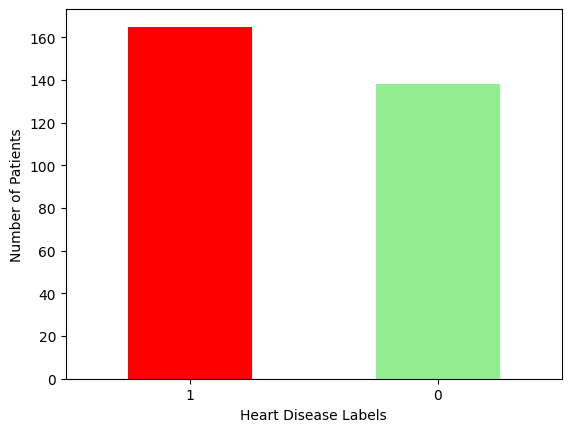

In [ ]:
#visualise the label column a bit
#Red as a warning signal and green as free
df['target'].value_counts().plot(kind = 'bar', color = ['red', 'lightgreen'])
plt.xlabel('Heart Disease Labels')
plt.xticks(rotation = 0)
plt.ylabel('Number of Patients');

In [ ]:
#Info describes the cloumns and their value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Describe mentions the relevant numerical analysis of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Visualising Frequency Vs Target graph
#First compare the two using pd.crosstab
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


In [ ]:
#Let's see the total women and men
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

This compare leads to the conclusive evidence that women are affecting quicker than men. As you can see in the data, out of 96 women, 72 are affected, which is about 75%.

<ipython-input-13-a6bcb1fc50e0>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


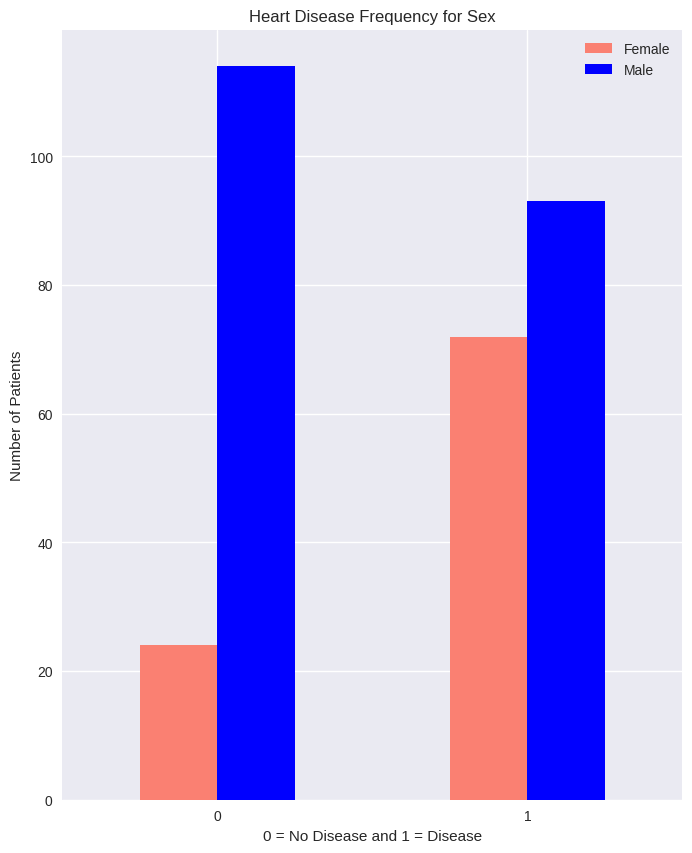

In [ ]:
#Create a comparison between target and sex
plt.style.use('seaborn')
pd.crosstab(df.target, df.sex).plot(kind = 'bar', color = ['salmon', 'blue'], figsize = (8, 10))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease and 1 = Disease')
plt.ylabel('Number of Patients')
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0);

**Age Vs Thalach (maximum heart rate) for heart disease plot**

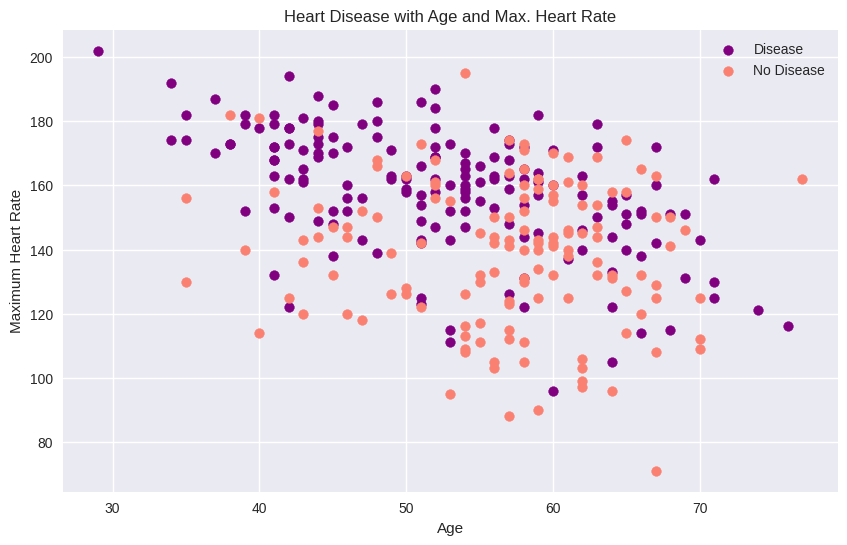

In [ ]:
#Create a plot
plt.figure(figsize = (10, 6))

#scatter plot
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = 'purple')

#Scatter with negative values
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = 'salmon')

#Description
plt.title('Heart Disease with Age and Max. Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(['Disease', 'No Disease']);

Check the age distribution column

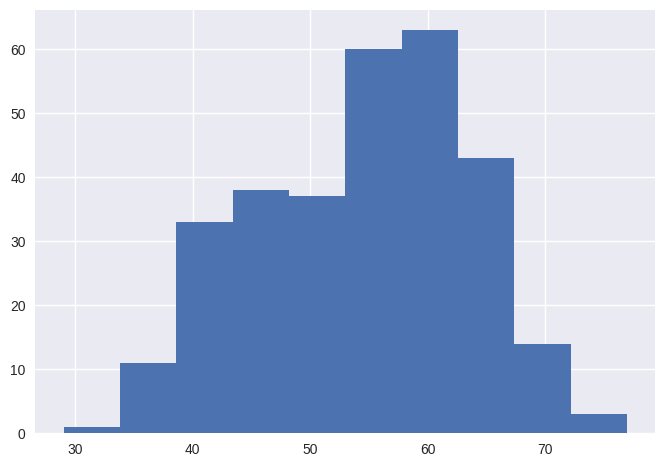

In [ ]:
df.age.hist();

Close to normal distribution graph.

Comparing chest pain and target

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


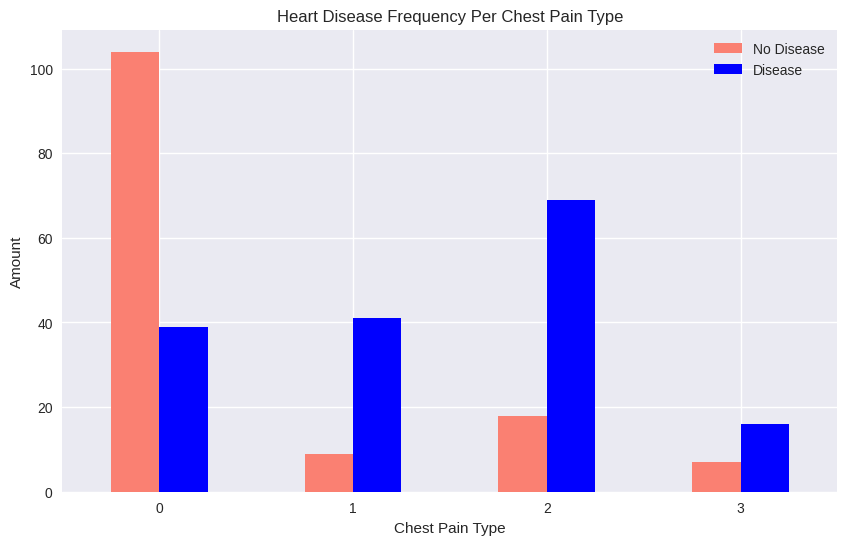

In [ ]:
#Visualise the data
pd.crosstab(df.cp, df.target).plot(kind = 'bar',
                                   figsize = (10, 6),
                                   color = ['salmon', 'blue'])

plt.xticks(rotation = 0)
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.legend(['No Disease', 'Disease'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount');

In [ ]:
#Makes a correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


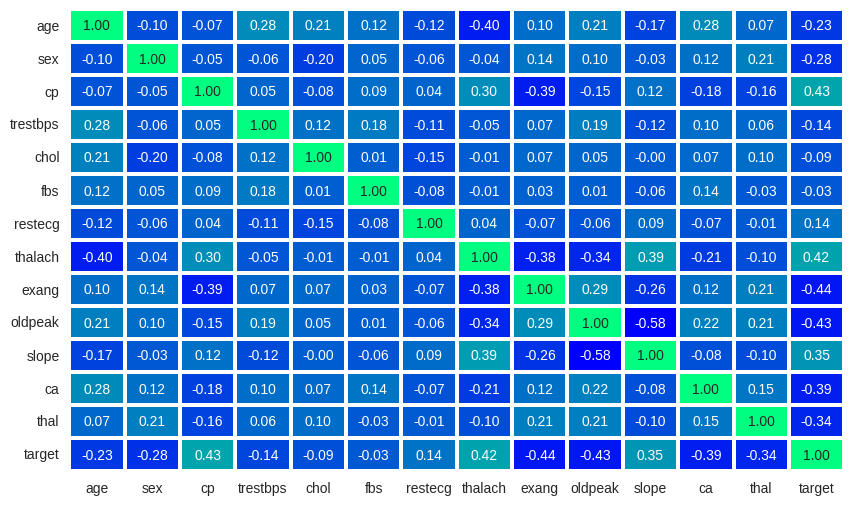

In [ ]:
#Let's visualise the correlation matrix more prettier
fig, ax = plt.subplots(figsize = (10, 6))
corr_mat = df.corr()
ax = sns.heatmap(corr_mat,
                 annot = True,
                 linewidths = 1.5,
                 fmt = '0.2f',
                 cbar = False,
                 cmap = 'winter');

**Positive Correlation:** As the one variable increases the related variable also increases.

**Negative Correlation:** As the one variable increases the related variable decreases.

**Modelling**

In [ ]:
#Split data into two values

X = df.drop('target', axis = 1)
y = df['target']

In [ ]:
#Split data into training and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Build the machine learning model**

We are going to use three classification models:

1. Logistic Regression from lnear_model
2. K Nearest Neighbors from neghbors
3. Random Forest from ensemble

In [ ]:
#Put models ina dictionary

models = {'Logistic Regresion': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

#Create a function to fit and evaluate the models
def fit_evaluate(models, X_train, X_test, y_train, y_test):
  #set the seed
  np.random.seed(42)
  #Make a dictonary for fitting models
  models_score = {}
  #Loop to the models
  for name, model in models.items():
    #Fit the model
    model.fit(X_train, y_train)
    #Evaluate the model and append its model scores
    models_score[name] = model.score(X_test, y_test)
  return models_score


In [ ]:
scoring_model = fit_evaluate(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

scoring_model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regresion': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Model Comparison


In [ ]:
model_comp = pd.DataFrame(scoring_model, index = ['accuracy'])
model_comp

,Logistic Regresion,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


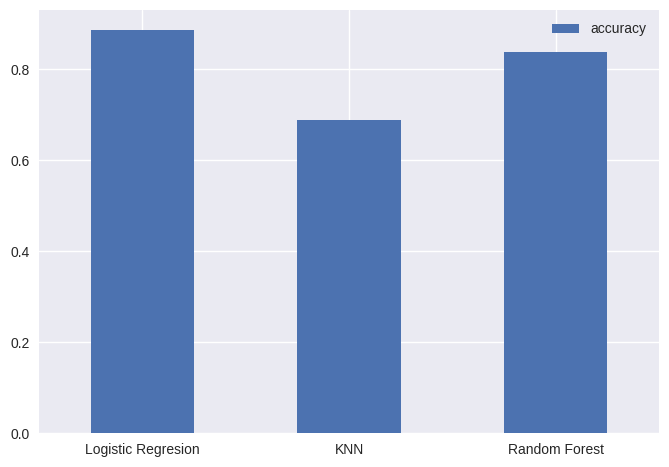

In [ ]:
model_comp.T.plot(kind = 'bar')
plt.xticks(rotation = 0);

Now, let's look at the following:

1. Hyperparameter tunning
2. Feature importance
3. Confusion Matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 score
8. Classification report
9. ROC curve
10. Area under the curve

**Hyperparameter Tuning**

1. KNN tuning

In [ ]:
#Tuning KNN hyperparameters

train_scores = []
test_scores = []

#Create a range for setting value of n_neighbors
tune = range(1, 21)

#Create a KNN
knn = KNeighborsClassifier()

#Loop through all tune
for i in tune:
  knn.set_params(n_neighbors = i)

  #Fit the algorithm
  knn.fit(X_train, y_train)

  #Update the training scores list
  train_scores.append(knn.score(X_train, y_train))

  #Update the test scores list
  test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores, test_scores

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

The maximum KNN score on the test data: 75.41%


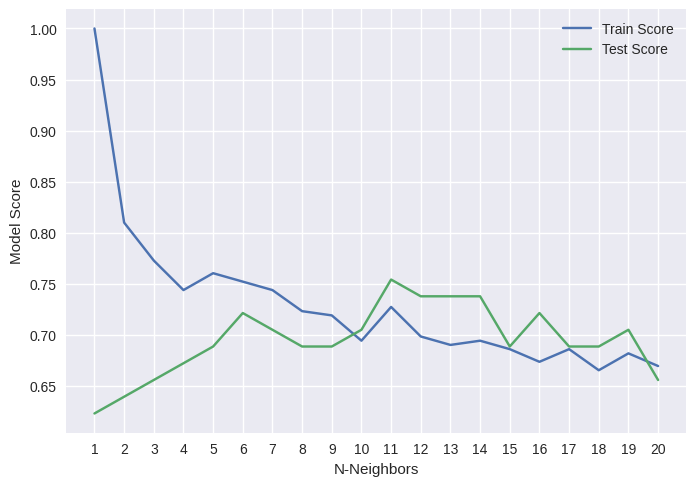

In [ ]:
#Visualse the sets
plt.plot(tune, train_scores, label = 'Train Score')
plt.plot(tune, test_scores, label = 'Test Score')
plt.xlabel('N-Neighbors')
plt.ylabel('Model Score')
plt.xticks(np.arange(1, 21, 1))
plt.legend()

print(f'The maximum KNN score on the test data: {max(test_scores) * 100:.2f}%')


**Hyperparameter tuning wth RandomizedSearchCV**

We're going tune

1. LogisticRegression()
2. RandomForestClassifier()

Using RandomizedSearchCV

In [ ]:
#Create a dict for hyperparameters for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
             'solver': ['liblinear']}

#Create a dict for randomforest
rf = {'n_estimators': np.arange(10, 1000, 100),
      'max_depth': [None, 1, 3, 5],
      'min_samples_split': np.arange(2, 20, 2),
      'min_samples_leaf': np.arange(1, 20, 2)
      }


Now, we've got all hyperparameter grids setup for each of our models. Let's tune them using RandomizedSearchCV.

In [ ]:
#Tune logistic regression model first
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

#Fit the hyperparameter grids to the LogisticRegression model

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
#Checking the best hyperparameter in all

rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
#Check the score for the testing data
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now, we're tuning RandomForest Hyperparameter grids

In [ ]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

#Fit the model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 1, 3, 5],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])},
                   verbose=True)

In [ ]:
#Checking the best params
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 7,
 'max_depth': 3}

In [ ]:
#Check the score
rs_rf.score(X_test, y_test)

0.8688524590163934

Now, we are going to use gridsearchcv for tuning hyperparameters of our models.

In [ ]:
#Setting up the hyperparameters grid again

log_reg_grd = {'C': np.logspace(-4, 4, 30),
               'solver': ['liblinear']}

#Setup the GridSearchCV for LogisticcRegression()

log_reg_cv = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grd,
                          cv = 5,
                          verbose = True)

#Fit in the model of improved hyperparameter
log_reg_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
#Checking the best params now
log_reg_cv.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
#Checking the score
log_reg_cv.score(X_test, y_test)

0.8852459016393442

Evaluating more scoring metrics:

1. ROC curve and AUC curve
2. Confusion matrix
3. Classification Report
4. Precision
5. F1 score
6. Recall

In [ ]:
#make predictions
y_preds = log_reg_cv.predict(X_test)

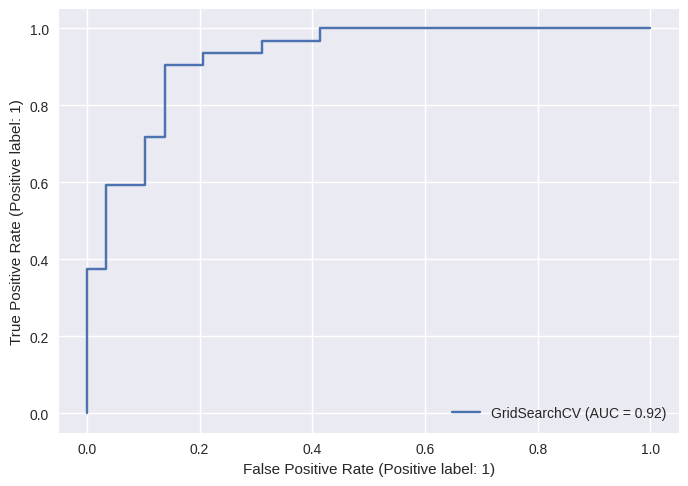

In [ ]:
#plot ROC curve and calculate AUC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(log_reg_cv, X_test, y_test)

In [ ]:
#Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


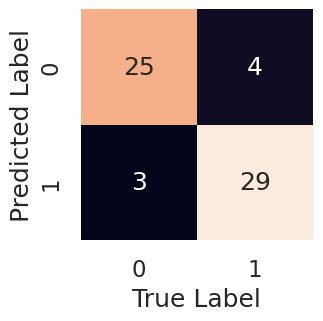

In [ ]:
#Visualse the confusion matriix using the heatmap

sns.set(font_scale = 1.5)

def plot_con_mat(y_test, y_preds):
  fig, ax = plt.subplots(figsize = (3, 3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot = True,
                   cbar = False,
                   )
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')

plot_con_mat(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Calculating evaluation metrics using cross-validation

In [ ]:
#Checking the best hyperparameters
log_reg_cv.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = 'liblinear')

Cross-valiidated accuracy

In [ ]:
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = 'accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

Cross-validated for precision

In [ ]:
cv_prec = cross_val_score(clf,
                          X,
                          y,
                          cv = 5,
                          scoring = 'precision')
cv_prec

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [ ]:
cv_prec = np.mean(cv_prec)
cv_prec

0.8207936507936507

Cross-valdated for recall

In [ ]:
cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv = 5,
                            scoring = 'recall')
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [ ]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

Cross-validated for f1-score

In [ ]:
cv_f1 = cross_val_score(clf,
                            X,
                            y,
                            cv = 5,
                            scoring = 'f1')
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [ ]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

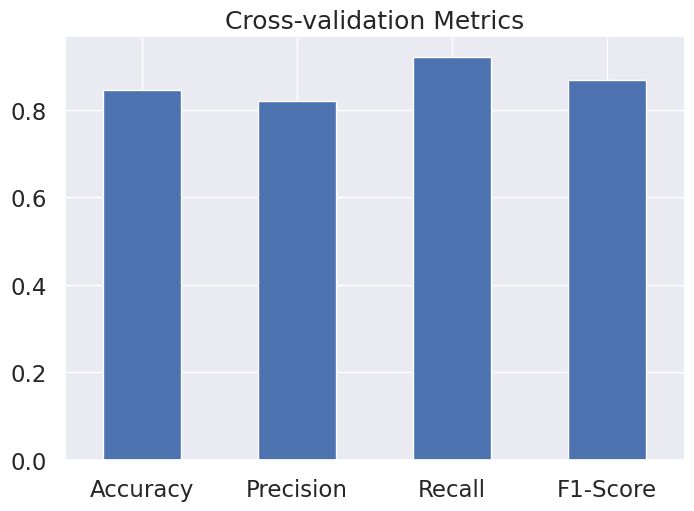

In [ ]:
#Visualise the metrics cross validation

cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_prec,
                           'Recall': cv_recall,
                           'F1-Score': cv_f1},
                          index = [0])

cv_metrics.T.plot.bar(title='Cross-validation Metrics', legend = False)
plt.xticks(rotation = 0);

**Feature Importance**

Which features are the most contributed in our model and how did they contribute?

In [ ]:
log_reg_cv.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [ ]:
#Check coef_
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [ ]:
#make a dictionary of columns with coef_ values
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

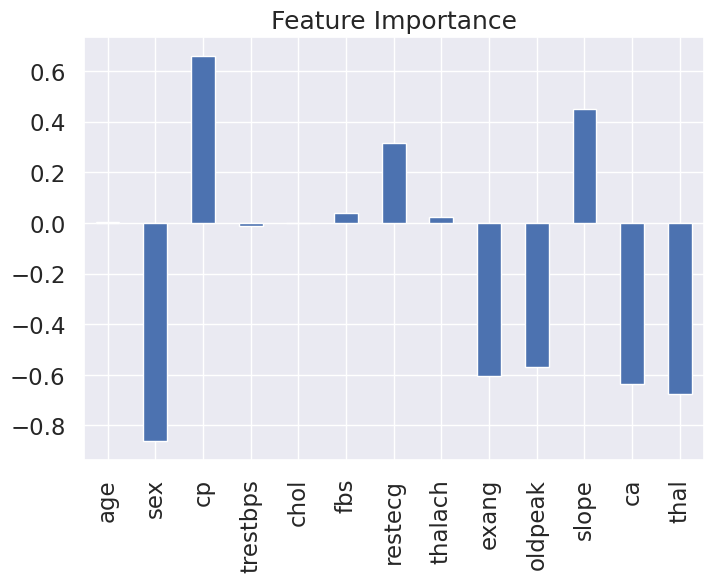

In [ ]:
#Visualise
feature_df = pd.DataFrame(feature_dict, index = [0])

feature_df.T.plot.bar(title = 'Feature Importance', legend = False);